In [4]:
import numpy as np
import sys
sys.path.insert(1,'/home/zhanibek/.local/lib/python2.7/site-packages/cv2')
sys.path.insert(1,'/home/zhanibek/catkin_ws/src/smart_tray/scripts/')
import cv2 
import matplotlib.pyplot as plt
import os
from tqdm import tqdm_notebook
import pickle
import pandas as pd
from phri.utils import *

### Constants

In [5]:
# meta_data_paths = [
# '/home/zhanibek/catkin_ws/src/smart_tray/data/rosbag/koh_sanket/trial_0/koh_sanket_trial_0_2020-10-11-20-48-27_meta_data.pkl',
# '/home/zhanibek/catkin_ws/src/smart_tray/data/rosbag/koh_zhanibek/trial_0/koh_zhanibek_trial_0_2020-10-11-21-19-07_meta_data.pkl',
# '/home/zhanibek/catkin_ws/src/smart_tray/data/rosbag/sanket_vignesh/trial_0/trial_0_2020-10-12-14-47-43_meta_data.pkl',
# '/home/zhanibek/catkin_ws/src/smart_tray/data/rosbag/sanket_vignesh/trial_1/trial_1_2020-10-12-14-51-53_meta_data.pkl',
# '/home/zhanibek/catkin_ws/src/smart_tray/data/rosbag/zhanibek_sanket/trial_0/trial_0_2020-10-12-15-02-32_meta_data.pkl',
# '/home/zhanibek/catkin_ws/src/smart_tray/data/rosbag/zhanibek_vignesh/trial_0/trial_0_2020-10-12-14-57-11_meta_data.pkl'
# ]


meta_data_paths = [
'/home/zhanibek/catkin_ws/src/smart_tray/data/rosbag/koh_sanket/trial_0/koh_sanket_trial_0_2020-10-11-20-48-27_meta_data_v2.pkl',
'/home/zhanibek/catkin_ws/src/smart_tray/data/rosbag/koh_zhanibek/trial_0/koh_zhanibek_trial_0_2020-10-11-21-19-07_meta_data.pkl',
'/home/zhanibek/catkin_ws/src/smart_tray/data/rosbag/sanket_vignesh/trial_0/trial_0_2020-10-12-14-47-43_meta_data.pkl',
'/home/zhanibek/catkin_ws/src/smart_tray/data/rosbag/sanket_vignesh/trial_1/trial_1_2020-10-12-14-51-53_meta_data.pkl',
'/home/zhanibek/catkin_ws/src/smart_tray/data/rosbag/zhanibek_sanket/trial_0/trial_0_2020-10-12-15-02-32_meta_data.pkl',
'/home/zhanibek/catkin_ws/src/smart_tray/data/rosbag/zhanibek_vignesh/trial_0/trial_0_2020-10-12-14-57-11_meta_data.pkl'
]

meta_data_path = meta_data_paths[0]

In [6]:
meta_data = pickle.load(open(meta_data_path))

In [7]:
meta_data.keys()

['camera_3_raw_pose_offline',
 'camera_3',
 '/cam1_tray_pose_estimation',
 'camera_3_grf_offline',
 'camera_2_raw_pose_offline',
 'camera_1_raw_pose_offline',
 'summary',
 'camera_1_grf_offline',
 '/cam2_tray_pose_estimation',
 '/cam3_tray_pose_estimation',
 '/cam1_tray_grf',
 '/cam2_tray_grf',
 'camera_2_grf_offline',
 'camera_1',
 'camera_2',
 '/RFT_FORCE',
 '/imu_data',
 '/RFT_FORCE_2',
 '/cam3_tray_grf']

In [25]:
summary = meta_data['summary']
cam1_df = meta_data['camera_1']
cam2_df = meta_data['camera_2']
cam3_df = meta_data['camera_3']

rft1_df = meta_data['/RFT_FORCE']
rft2_df = meta_data['/RFT_FORCE_2']

imu_df = meta_data['/imu_data']

pose1_df = meta_data['/cam1_tray_pose_estimation']
pose2_df = meta_data['/cam2_tray_pose_estimation']
pose3_df = meta_data['/cam3_tray_pose_estimation']

grf1_df = meta_data['/cam1_tray_grf']
grf2_df = meta_data['/cam2_tray_grf']
grf3_df = meta_data['/cam3_tray_grf']


### Summary

In [26]:
summary

,topic_name,message_count,frequency,msg_type,start_time,end_time
0,/cam1_tray_pose_estimation,5790,20.014525,geometry_msgs/PoseStamped,1.602467e+09,1.602468e+09
1,/cam2_tray_grf,3858,30.558701,geometry_msgs/PoseStamped,1.602467e+09,1.602468e+09
2,/cam2_tray_pose_estimation,8908,30.654739,geometry_msgs/PoseStamped,1.602467e+09,1.602468e+09
3,/cam3_tray_pose_estimation,8910,29.983944,geometry_msgs/PoseStamped,1.602467e+09,1.602468e+09
4,/cam1_tray_grf,3678,19.198096,geometry_msgs/PoseStamped,1.602467e+09,1.602468e+09
5,/RFT_FORCE_2,251144,1005.105200,geometry_msgs/WrenchStamped,1.602467e+09,1.602468e+09
6,/RFT_FORCE,250060,1005.587149,geometry_msgs/WrenchStamped,1.602467e+09,1.602468e+09
7,/imu_data,22964,77.253127,smart_tray/imu_msg,1.602467e+09,1.602468e+09
8,/cam3_tray_grf,3801,29.804438,geometry_msgs/PoseStamped,1.602467e+09,1.602468e+09


In [27]:
t0 = summary.start_time[0]
tf = summary.end_time[0]
print t0, tf
print tf-t0

1602467307.9841824 1602467605.1219714
297.1377890110016


In [28]:
imu_delay = 52345.383253

In [29]:
cam1_df.shape[0]

2556

In [30]:
cam1_df.head()

,seq,time_stamp,frame_id,image_path
0,16939,1.602467e+09,angetube_16938,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
1,16940,1.602467e+09,angetube_16939,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
2,16941,1.602467e+09,angetube_16940,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
3,16942,1.602467e+09,angetube_16941,/home/zhanibek/catkin_ws/src/smart_tray/data/r...
4,16943,1.602467e+09,angetube_16942,/home/zhanibek/catkin_ws/src/smart_tray/data/r...


In [31]:
cam1_df.dtypes

seq             int64
time_stamp    float64
frame_id       object
image_path     object
dtype: object

In [32]:
imname = cam1_df.image_path[0]

In [33]:
imname

'/home/zhanibek/catkin_ws/src/smart_tray/data/rosbag/koh_sanket/trial_0/camera_1/images/angetube_16938_16939_1602467304_290581941.png'

In [34]:
pose1_df.head()

,seq,time_stamp,frame_id,position,quaternion
0,12113,1.602467e+09,angetube_17049,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"
1,12114,1.602467e+09,angetube_17050,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"
2,12115,1.602467e+09,angetube_17051,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"
3,12116,1.602467e+09,angetube_17057,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"
4,12117,1.602467e+09,angetube_17058,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"


In [35]:
grf1_df.head()

,seq,time_stamp,frame_id,position,quaternion
0,5104,1.602467e+09,GRF repr,"[1.4416516412268763, 0.12091638969407859, -0.0...","[-0.023068918288473923, -0.00436439876706539, ..."
1,5105,1.602467e+09,GRF repr,"[1.441651641227282, 0.1209163896948584, -0.076...","[-0.02306891828807183, -0.004364398767461976, ..."
2,5106,1.602467e+09,GRF repr,"[1.4416516412291016, 0.12091638969789464, -0.0...","[-0.02306891828818354, -0.004364398767403888, ..."
3,5107,1.602467e+09,GRF repr,"[1.40922405733074, 0.06614327995929337, -0.037...","[-0.019383220702379824, -0.005523757666953789,..."
4,5108,1.602467e+09,GRF repr,"[1.4347264335545937, 0.10984693179568783, -0.0...","[-0.03313021546727491, -0.009383176778713248, ..."


### Camera 1

863


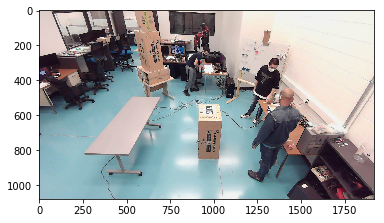

In [36]:
df = cam1_df
ind = np.random.randint(df.shape[0])
impath = df.image_path.iloc[ind]
im = read_image(impath)
plt.imshow(im)
print ind

### Force Data

In [37]:
rft1_df.head()

,seq,time_stamp,frame_id,force,torque
0,386880,1.602467e+09,C00300122,"[0.05999999865889549, -0.03999999910593033, -0...","[0.0, -0.0005000000237487257, 0.0]"
1,386881,1.602467e+09,C00300122,"[0.05999999865889549, -0.03999999910593033, -0...","[0.0, -0.0005000000237487257, 0.0]"
2,386882,1.602467e+09,C00300122,"[0.0, 0.0, -0.14000000059604645]","[0.0005000000237487257, 0.0, 0.000500000023748..."
3,386883,1.602467e+09,C00300122,"[-0.019999999552965164, 0.0, -0.14000000059604...","[0.0005000000237487257, 0.0, 0.001500000013038..."
4,386884,1.602467e+09,C00300122,"[-0.03999999910593033, 0.03999999910593033, -0...","[0.0010000000474974513, 0.0, 0.001500000013038..."


Text(0.5,1,'Force 1')

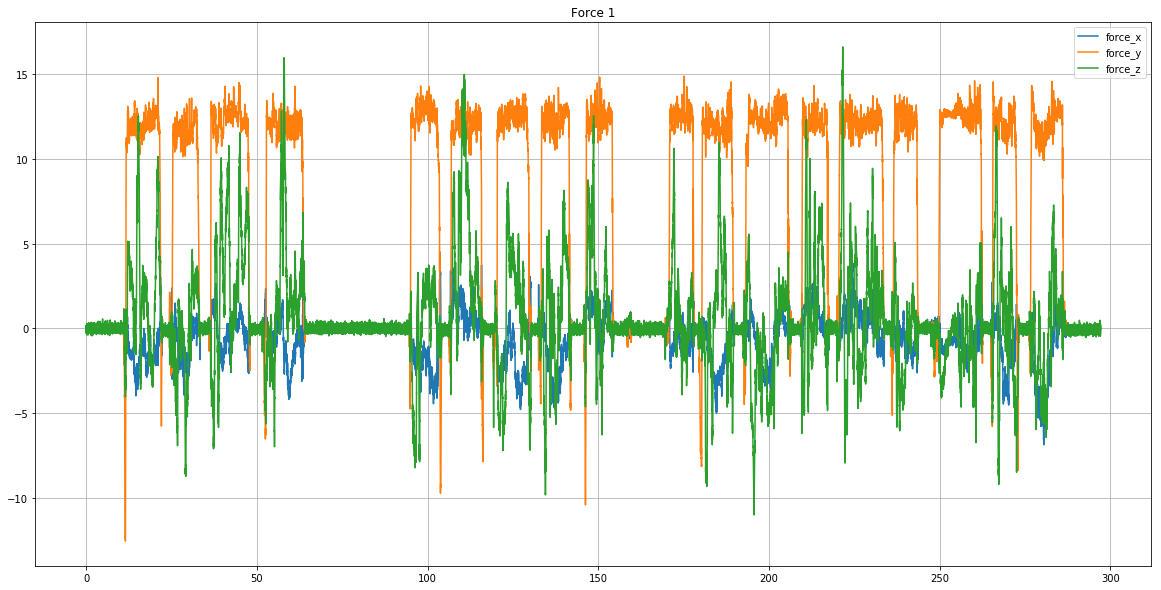

In [38]:
df = rft1_df
force1_x = df.force.apply(lambda x: x[0])
force1_y = df.force.apply(lambda x: x[1])
force1_z = df.force.apply(lambda x: x[2])

rft1_t_vec = df.time_stamp-t0

plt.figure(figsize=(20,10))
plt.plot(rft1_t_vec, force1_x)
plt.plot(rft1_t_vec, force1_y)
plt.plot(rft1_t_vec, force1_z)
plt.grid()
plt.legend(['force_x', 'force_y', 'force_z'])
plt.title('Force 1')

Text(0.5,1,'Force 1')

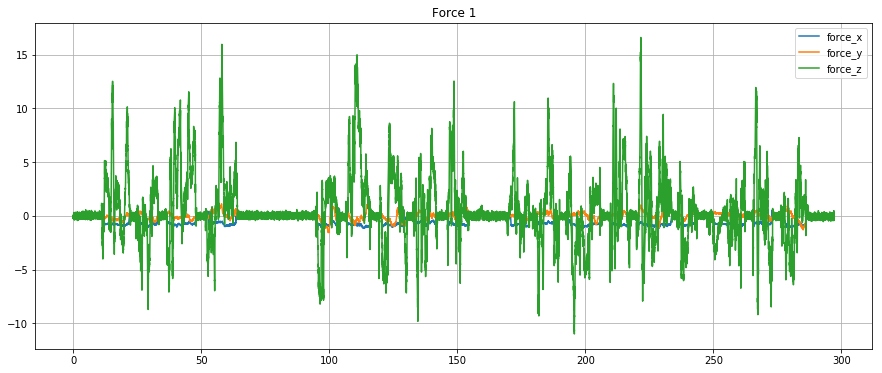

In [57]:
df = rft1_df
torque1_x = df.torque.apply(lambda x: x[0])
torque1_y = df.torque.apply(lambda x: x[1])
torque1_z = df.torque.apply(lambda x: x[2])

rft1_t_vec = df.time_stamp-t0

plt.figure(figsize=(15,6))
plt.plot(rft1_t_vec, torque1_x)
plt.plot(rft1_t_vec, torque1_y)
plt.plot(rft1_t_vec, force1_z)
plt.grid()
plt.legend(['force_x', 'force_y', 'force_z'])
plt.title('Force 1')

In [40]:
rft2_df.head()

,seq,time_stamp,frame_id,force,torque
0,386128,1.602467e+09,C00300119,"[0.0, -0.019999999552965164, -0.01999999955296...","[-0.0005000000237487257, -0.001000000047497451..."
1,386129,1.602467e+09,C00300119,"[0.0, -0.019999999552965164, -0.01999999955296...","[0.0, -0.0010000000474974513, 0.0]"
2,386130,1.602467e+09,C00300119,"[0.0, -0.019999999552965164, -0.01999999955296...","[0.0, -0.0010000000474974513, 0.00050000002374..."
3,386131,1.602467e+09,C00300119,"[0.0, 0.0, -0.019999999552965164]","[0.0, -0.0010000000474974513, 0.00050000002374..."
4,386132,1.602467e+09,C00300119,"[-0.019999999552965164, 0.0, -0.03999999910593...","[0.0, -0.0005000000237487257, 0.00100000004749..."


Text(0.5,1,'Force 2')

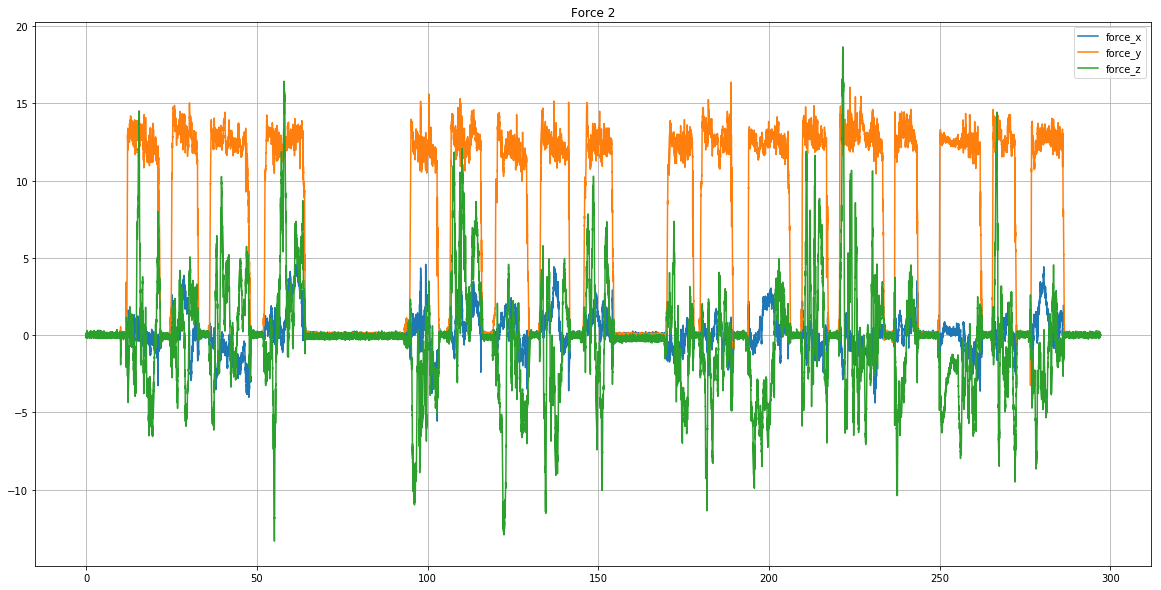

In [41]:
df = rft2_df
force2_x = df.force.apply(lambda x: x[0])
force2_y = df.force.apply(lambda x: x[1])
force2_z = df.force.apply(lambda x: x[2])

rft2_t_vec = df.time_stamp-t0

plt.figure(figsize=(20,10))
plt.plot(rft2_t_vec, force2_x)
plt.plot(rft2_t_vec, force2_y)
plt.plot(rft2_t_vec, force2_z)
plt.grid()
plt.legend(['force_x', 'force_y', 'force_z'])
plt.title('Force 2')

Text(0.5,1,'Torque 2')

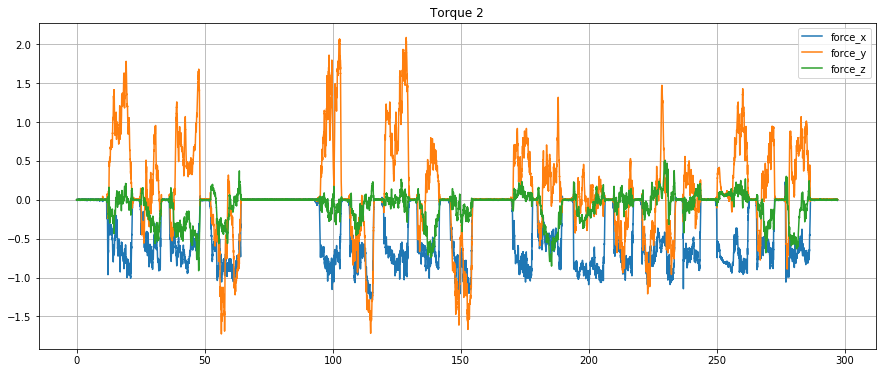

In [43]:
df = rft2_df
torque2_x = df.torque.apply(lambda x: x[0])
torque2_y = df.torque.apply(lambda x: x[1])
torque2_z = df.torque.apply(lambda x: x[2])

rft2_t_vec = df.time_stamp-t0

plt.figure(figsize=(15,6))
plt.plot(rft2_t_vec, torque2_x)
plt.plot(rft2_t_vec, torque2_y)
plt.plot(rft2_t_vec, torque2_z)
plt.grid()
plt.legend(['force_x', 'force_y', 'force_z'])
plt.title('Torque 2')

## Position Data

### grf

Text(0.5,1,'Linear Position')

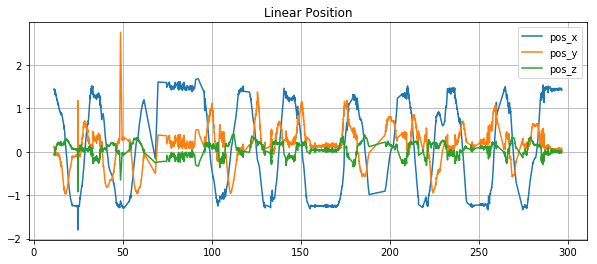

In [44]:
df = grf1_df
grf1_x = df.position.apply(lambda x: x[0])
grf1_y = df.position.apply(lambda x: x[1])
grf1_z = df.position.apply(lambda x: x[2])

grf1_t_vec = df.time_stamp-t0

plt.figure(figsize=(10,4))
plt.plot(grf1_t_vec, grf1_x)
plt.plot(grf1_t_vec, grf1_y)
plt.plot(grf1_t_vec, grf1_z)
plt.grid()
plt.legend(['pos_x', 'pos_y', 'pos_z'])
plt.title('Linear Position')

Text(0.5,1,'Linear Position')

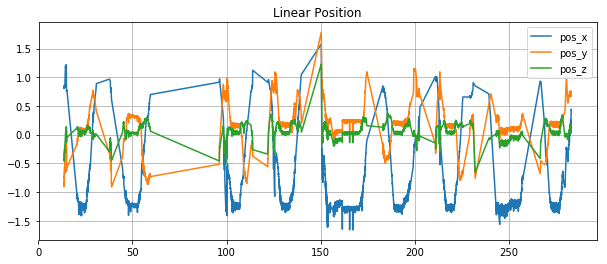

In [45]:
df = grf2_df
grf2_x = df.position.apply(lambda x: x[0])
grf2_y = df.position.apply(lambda x: x[1])
grf2_z = df.position.apply(lambda x: x[2])

grf2_t_vec = df.time_stamp-t0

plt.figure(figsize=(10,4))
plt.plot(grf2_t_vec, grf2_x)
plt.plot(grf2_t_vec, grf2_y)
plt.plot(grf2_t_vec, grf2_z)
plt.grid()
plt.legend(['pos_x', 'pos_y', 'pos_z'])
plt.title('Linear Position')

Text(0.5,1,'Linear Position')

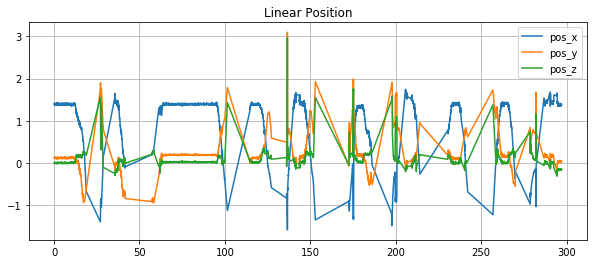

In [47]:
df = grf3_df
grf3_x = df.position.apply(lambda x: x[0])
grf3_y = df.position.apply(lambda x: x[1])
grf3_z = df.position.apply(lambda x: x[2])

grf3_t_vec = df.time_stamp-t0

plt.figure(figsize=(10,4))
plt.plot(grf3_t_vec, grf3_x)
plt.plot(grf3_t_vec, grf3_y)
plt.plot(grf3_t_vec, grf3_z)
plt.grid()
plt.legend(['pos_x', 'pos_y', 'pos_z'])
plt.title('Linear Position')

### Raw Pose Data

Text(0.5,1,'Linear Position')

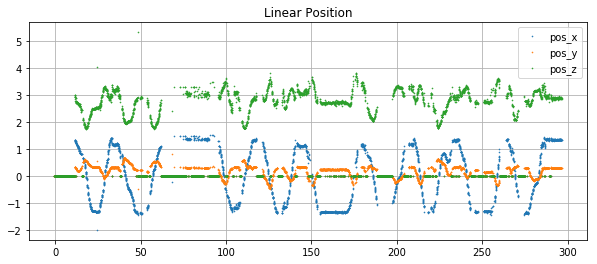

In [48]:
df = pose1_df
pose1_x = df.position.apply(lambda x: x[0])
pose1_y = df.position.apply(lambda x: x[1])
pose1_z = df.position.apply(lambda x: x[2])

pose1_t_vec = df.time_stamp-t0

plt.figure(figsize=(10,4))
plt.plot(pose1_t_vec, pose1_x, '.', MarkerSize=1.2)
plt.plot(pose1_t_vec, pose1_y, '.', MarkerSize=1.2)
plt.plot(pose1_t_vec, pose1_z, '.', MarkerSize=1.2)
plt.grid()
plt.legend(['pos_x', 'pos_y', 'pos_z'])
plt.title('Linear Position')

Text(0.5,1,'Linear Position')

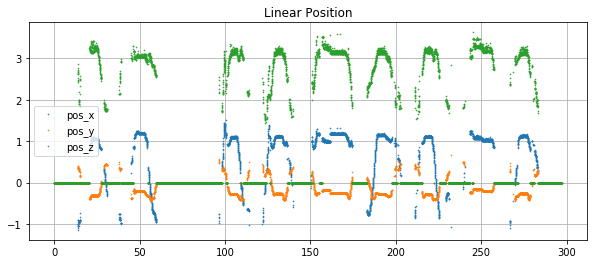

In [49]:
df = pose2_df
pose2_x = df.position.apply(lambda x: x[0])
pose2_y = df.position.apply(lambda x: x[1])
pose2_z = df.position.apply(lambda x: x[2])

pose2_t_vec = df.time_stamp-t0

plt.figure(figsize=(10,4))
plt.plot(pose2_t_vec, pose2_x, '.', MarkerSize=1.2)
plt.plot(pose2_t_vec, pose2_y, '.', MarkerSize=1.2)
plt.plot(pose2_t_vec, pose2_z, '.', MarkerSize=1.2)
plt.grid()
plt.legend(['pos_x', 'pos_y', 'pos_z'])
plt.title('Linear Position')

Text(0.5,1,'Linear Position')

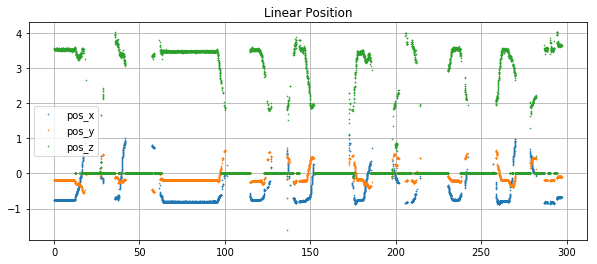

In [50]:
df = pose3_df
pose3_x = df.position.apply(lambda x: x[0])
pose3_y = df.position.apply(lambda x: x[1])
pose3_z = df.position.apply(lambda x: x[2])

pose3_t_vec = df.time_stamp-t0

plt.figure(figsize=(10,4))
plt.plot(pose3_t_vec, pose3_x, '.', MarkerSize=1.2)
plt.plot(pose3_t_vec, pose3_y, '.', MarkerSize=1.2)
plt.plot(pose3_t_vec, pose3_z, '.', MarkerSize=1.2)
plt.grid()
plt.legend(['pos_x', 'pos_y', 'pos_z'])
plt.title('Linear Position')

### IMU Data

In [51]:
imu_df.head()

,seq,time_stamp,frame_id,accel,gyro,mag
0,32046,1.602467e+09,LSM9DS1_IMU_SENSOR_DATA,"[-0.0873558349609375, -0.07000433349609375, 9....","[0.04486083984375, -0.052337646484375, 0.05233...","[0.07742000371217728, 0.038920000195503235, -0..."
1,32047,1.602467e+09,LSM9DS1_IMU_SENSOR_DATA,"[-0.09872406005859376, -0.13941033935546876, 9...","[-0.10467529296875, -0.127105712890625, -0.127...","[0.07854000478982925, 0.03415999934077263, -0...."
2,32048,1.602467e+09,LSM9DS1_IMU_SENSOR_DATA,"[-0.058037780761718755, -0.12923876953125002, ...","[0.0, 0.037384033203125, 0.112152099609375]","[0.08021999895572662, 0.035280000418424606, -0..."
3,32049,1.602467e+09,LSM9DS1_IMU_SENSOR_DATA,"[-0.030514709472656252, -0.08316754150390626, ...","[-0.157012939453125, -0.097198486328125, -0.08...","[0.08260000497102737, 0.033740002661943436, -0..."
4,32050,1.602467e+09,LSM9DS1_IMU_SENSOR_DATA,"[-0.01017156982421875, -0.14838525390625001, 9...","[0.052337646484375, 0.157012939453125, -0.1869...","[0.08021999895572662, 0.03304000198841095, -0...."


In [52]:
df.time_stamp[0]

1602467308.121951

Text(0.5,1,'Acceleration')

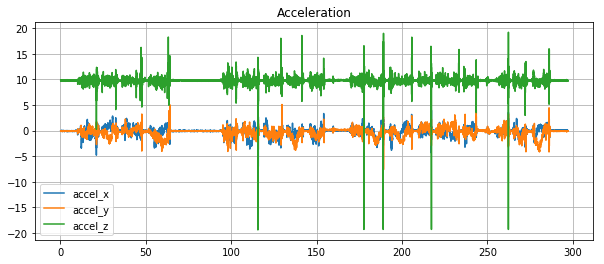

In [55]:
df = imu_df
accel_x = df.accel.apply(lambda x: x[0])
accel_y = df.accel.apply(lambda x: x[1])
accel_z = df.accel.apply(lambda x: x[2])

imu_t_vec = df.time_stamp-t0# + imu_delay

plt.figure(figsize=(10,4))
plt.plot(imu_t_vec, accel_x)
plt.plot(imu_t_vec, accel_y)
plt.plot(imu_t_vec, accel_z)
plt.grid()
plt.legend(['accel_x', 'accel_y', 'accel_z'])
plt.title('Acceleration')

### Mix Plot

Text(0.5,0,'time, sec')

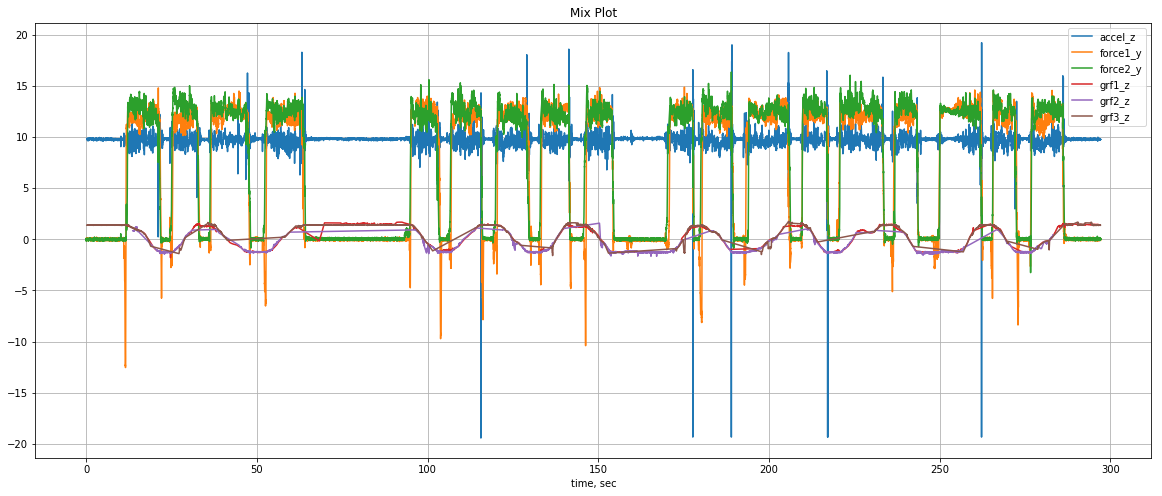

In [56]:
plt.figure(figsize=(20,8))

plt.plot(imu_t_vec, accel_z)
plt.plot(rft1_t_vec, force1_y)
plt.plot(rft2_t_vec, force2_y)
plt.plot(grf1_t_vec, grf1_x)
plt.plot(grf2_t_vec, grf2_x)
plt.plot(grf3_t_vec, grf3_x)
plt.grid()
plt.legend(['accel_z', 'force1_y', 'force2_y', 'grf1_z', 'grf2_z', 'grf3_z'])
plt.title('Mix Plot')
plt.xlabel('time, sec')